<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/assignment_on_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset into the python environment

iris=pd.read_excel('/content/iris (1).xls')
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# check basic details of the dataset

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# check for null values

iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

there are 7 null values in sepal length column ,6 in sepal width column and 6 in petal length column.moreover classification column contains categorical data.

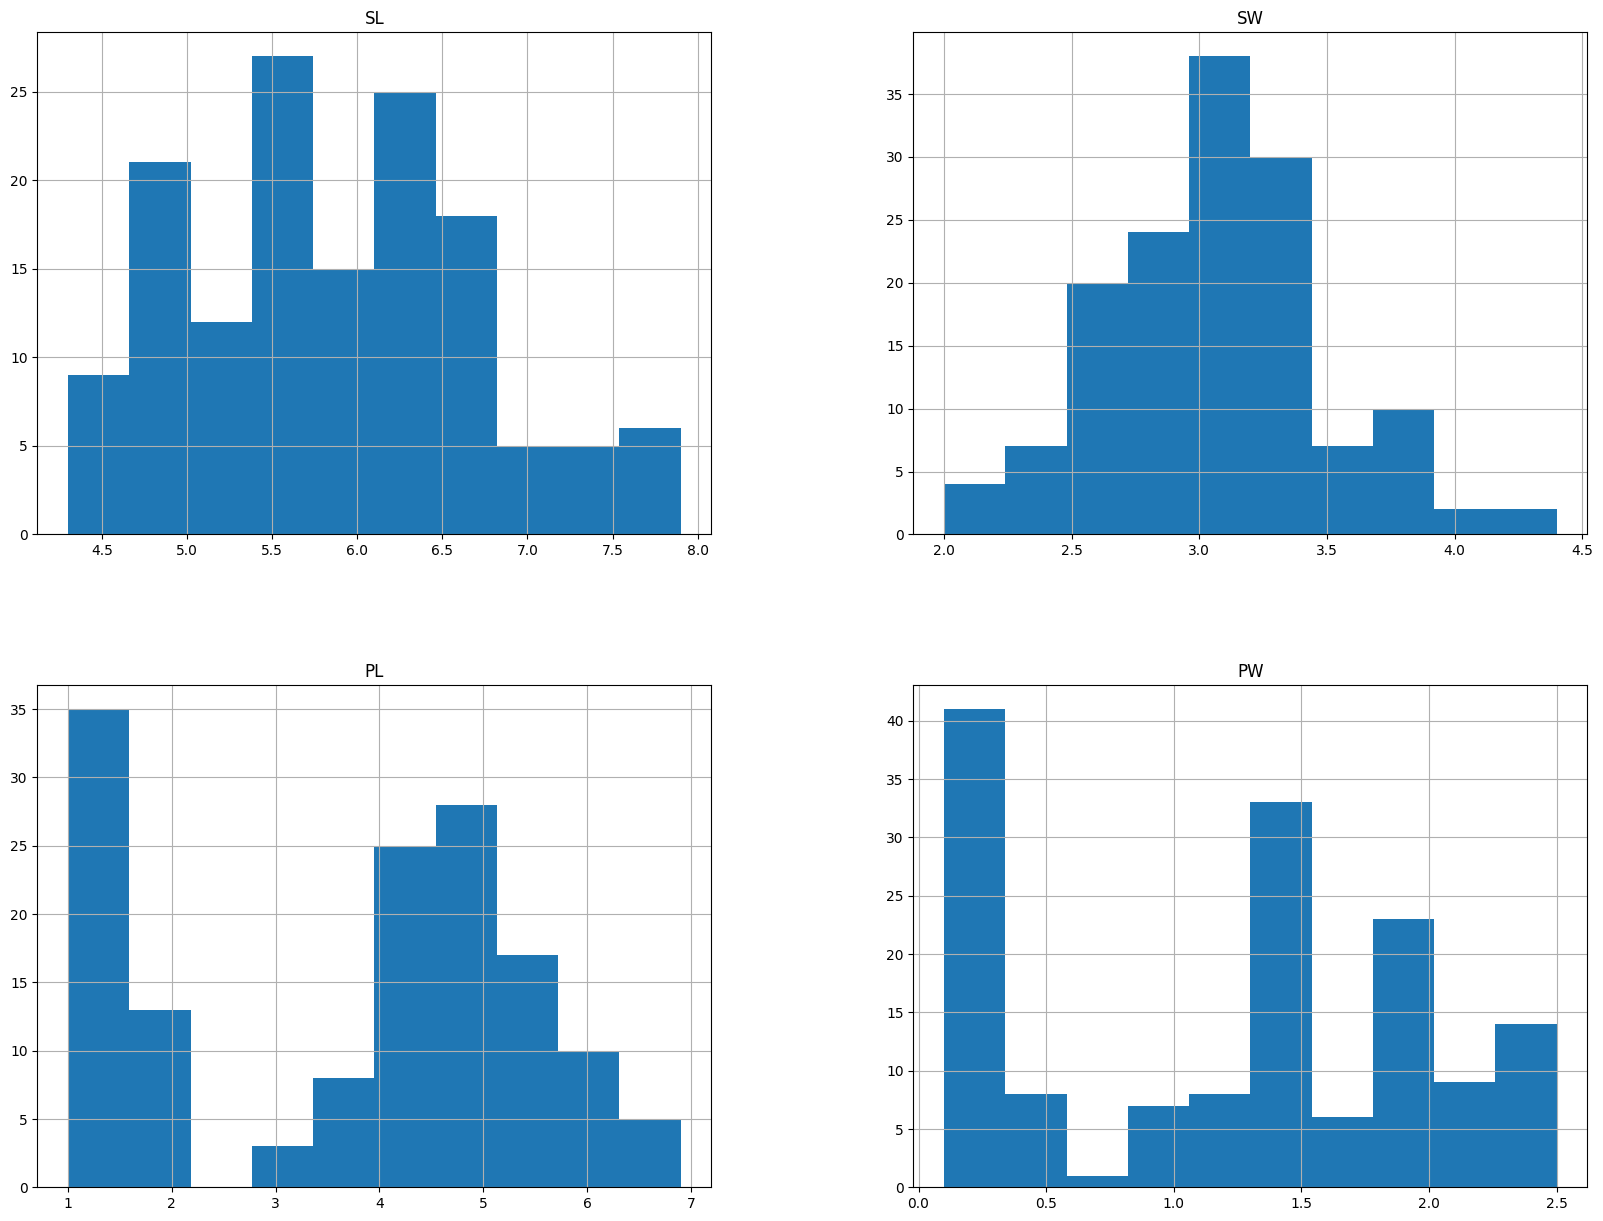

In [5]:
# let's plot the data to check skewness

num_columns = iris.select_dtypes(include=['float64'])
num_columns.hist(figsize=(20,15));

In [6]:
for i in ['SL', 'SW', 'PL', 'PW']:
    skewness = iris[i].skew()
    print(i, ':', skewness)
    if skewness <= -1 or skewness >= 1:
        print('Highly skewed distribution')
    elif (skewness > -1 and skewness < -0.5) or (skewness < 1 and skewness > 0.5):
        print('Moderately skewed distribution')
    else:
        print('Approximately symmetric distribution')
        print('                                      ')


#if the skewness value < -1 or > +1 -- Highly skewed distribution
#if the skewness value is between -1 & -1/2 or between +1/2 & +1 -- Moderately␣ skewed distribution
#if the skewness value between -1/2 & +1/2 -- Approximately symmetric distribution

SL : 0.3068227108046868
Approximately symmetric distribution
                                      
SW : 0.37781843718771746
Approximately symmetric distribution
                                      
PL : -0.2689053923783847
Approximately symmetric distribution
                                      
PW : -0.10499656214412734
Approximately symmetric distribution
                                      


All the skewness values are within the range of -0.5 to 0.5, which typically indicates a fairly symmetric distribution. None of the features show a pronounced skewness (e.g., values greater than 1 or less than -1) that would usually raise concerns in statistical analyses or model training. These slight skewness values suggest that any transformation for correcting skewness might not be necessary.

In [7]:
# Handling missing values by replacing them with the mean of their column

for i in ['SL', 'SW', 'PL']:
  iris[i]=iris[i].fillna(iris[i].mean())

In [8]:
iris

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [9]:
# now Encoding categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Classification'] = le.fit_transform(iris['Classification'])

In [10]:
iris

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [11]:
# Splitting the dataset into features (X) and target (y)

X = iris.drop('Classification', axis=1)
y = iris['Classification']

In [12]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
 #scale the features so that all of them can be uniformly evaluated

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Applying different classification models and finding the best one

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Dictionary of models

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [19]:
# define loop that will iterate over each item in the Dictionary of models and evaluate its performance.

from sklearn.metrics import accuracy_score

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy of {model_name}: {accuracy_score(y_test, y_pred)}")

Accuracy of Logistic Regression: 0.9333333333333333
Accuracy of K-Nearest Neighbors: 1.0
Accuracy of Support Vector Classifier: 0.9666666666666667
Accuracy of Decision Tree Classifier: 0.9666666666666667
Accuracy of Random Forest Classifier: 0.9666666666666667


 based on the accuracy scores that we got,The K-Nearest Neighbors (KNN) classifier has the highest accuracy score of 1.0. Therefore, the K-Nearest Neighbors model is the best model .